Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import requests
import json
from datetime import datetime
import pandas as pd

def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print("Failed to download the data.")
        return None

def extract_data(data):
    formatted_data = []
    episodes = data.get('_embedded', {}).get('episodes', [])
    for episode in episodes:
        formatted_data.append({
            'id': int(episode.get('id', '')),
            'url': episode.get('url', ''),
            'name': episode.get('name', ''),
            'season': int(episode.get('season', '')),
            'number': int(episode.get('number', '')),
            'type': episode.get('type', ''),
            'airdate': datetime.strptime(episode.get('airdate', ''), "%Y-%m-%d"),
            'airtime': datetime.strptime(episode.get('airtime', ''), "%H:%M").time(),
            'runtime':float(episode.get('runtime', 0.0)),
            'average rating': float(episode.get('rating', {}).get('average', 0.0)),
            'summary': episode.get('summary', '').strip('<p>').strip('</p>'),
            'medium image link': episode.get('image', {}).get('medium', ''),
            'original image link': episode.get('image', {}).get('original', '')
        })

    return formatted_data

# Example usage
data_url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

data = download_data(data_url)
id=[]
url=[]
name=[]
season = []
number=[]
types=[]
episode_airdates = []
episode_airtimes = []
episode_runtimes = []
episode_average_ratings = []
episode_summaries = []
episode_medium_images = []
episode_original_images = []

if data is not None:
    extracted_data = extract_data(data)
    for episode in extracted_data:
      id.append(episode['id'])
      url.append(episode['url'])
      name.append(episode['name'])
      types.append(episode['type'])
      season.append(episode['season'])
      number.append(episode['number'])
      episode_airdates.append(episode['airdate'])
      episode_airtimes.append(episode['airtime'])
      episode_runtimes.append(episode['runtime'])
      episode_average_ratings.append(episode['average rating'])
      episode_summaries.append(episode['summary'])
      episode_medium_images.append(episode['medium image link'])
      episode_original_images.append(episode['original image link'])


df = pd.DataFrame({
    'ID': id,
    'Url': url,
    'Name': name,
    'Types': types,
    'Season': season,
    'Episode': number,
    'Airdate': episode_airdates,
    'Airtime': episode_airtimes,
    'Runtime': episode_runtimes,
    'Rating': episode_average_ratings,
    'Summary': episode_summaries,
    'Medium Image': episode_medium_images,
    'Original Image': episode_original_images
})

In [31]:
df.head(10)

,ID,Url,Name,Types,Season,Episode,Airdate,Airtime,Runtime,Rating,Summary,Medium Image,Original Image
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,regular,1,1,2016-10-02,21:00:00,68.0,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,regular,1,2,2016-10-09,21:00:00,60.0,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,regular,1,3,2016-10-16,21:00:00,60.0,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,regular,1,4,2016-10-23,21:00:00,60.0,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,regular,1,5,2016-10-30,21:00:00,60.0,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
5,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,regular,1,6,2016-11-06,21:00:00,60.0,8.0,"While Maeve convinces Felix to show her ""upsta...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,regular,1,7,2016-11-13,21:00:00,60.0,8.6,While William and Dolores travel to the unclai...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
7,943065,https://www.tvmaze.com/episodes/943065/westwor...,Trace Decay,regular,1,8,2016-11-20,21:00:00,60.0,7.9,Bernard tries to cope with what he did under R...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,regular,1,9,2016-11-27,21:00:00,60.0,8.5,Bernard forces Robert to take him back into hi...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,regular,1,10,2016-12-04,21:00:00,90.0,8.7,Delores finds out the truth about William's fa...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


Get all overll ratings with respect to season:
  Season
1    8.0900
2    8.0000
3    7.7750
4    7.5375
Name: Rating, dtype: float64


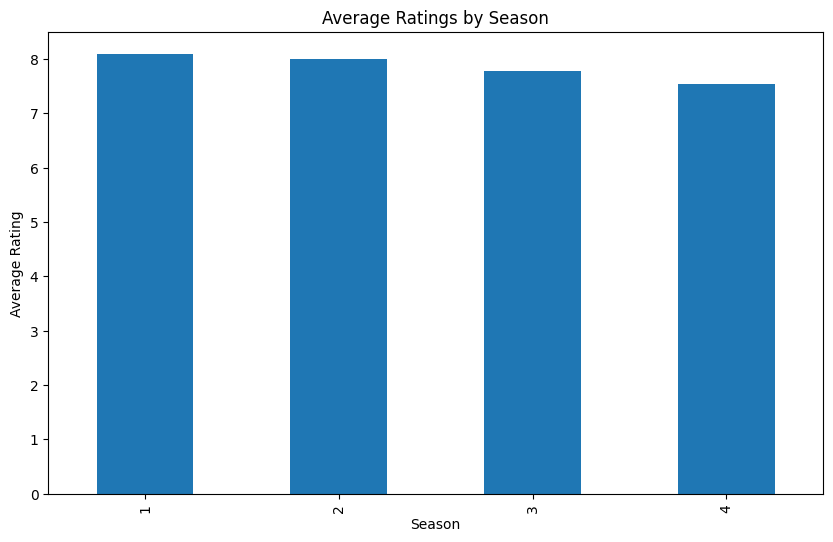

In [28]:
# 1) Get all the overall ratings for each season and compare the ratings using plots
season_ratings = df.groupby('Season')['Rating'].mean()
print("Get all overll ratings with respect to season:\n ",season_ratings)

# Plot the ratings for each season
plt.figure(figsize=(10, 6))
season_ratings.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Season')
plt.show()

In [29]:
# 2) Get all the episode names whose average rating is more than 8 for every season
high_rated_episodes = df.groupby(['Season', 'Name'])['Rating'].mean().reset_index()
high_rated_episodes = high_rated_episodes[high_rated_episodes['Rating'] > 8]
episode_names_high_rated = high_rated_episodes['Name'].tolist()
print("Getting all the episode names whose average rating is more than 8 for every season: \n",episode_names_high_rated)

Getting all the episode names whose average rating is more than 8 for every season: 
 ['The Bicameral Mind', 'The Well-Tempered Clavier', "Trompe L'Oeil", 'Kiksuya', 'The Passenger', 'Vanishing Point']


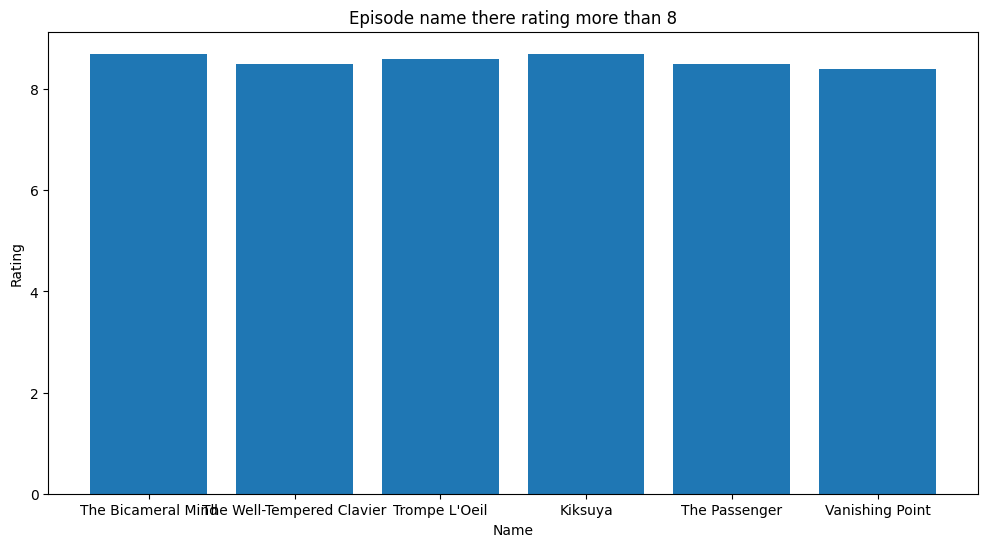

In [34]:
# plotting Name vs rating more than 8 
plt.figure(figsize=(12, 6))
plt.bar(episode_names_high_rated,high_rated_episodes['Rating'])
plt.xlabel('Name')
plt.ylabel('Rating')
plt.title('Episode name there rating more than 8')
plt.show()

In [37]:
# 3) Get all the episode names that aired before May 2019
df['Airdate'] = pd.to_datetime(df['Airdate'])
episodes_before_may_2019 = df[df['Airdate'] < pd.Timestamp('2019-05-01')]
episode_names_before_may_2019 = episodes_before_may_2019['Name'].tolist()
print("Getting all the episode names that aired before May 2019: \n",episode_names_before_may_2019)

Getting all the episode names that aired before May 2019: 
 ['The Original', 'Chestnut', 'The Stray', 'Dissonance Theory', 'Contrapasso', 'The Adversary', "Trompe L'Oeil", 'Trace Decay', 'The Well-Tempered Clavier', 'The Bicameral Mind', 'Journey Into Night', 'Reunion', 'Virtù e Fortuna', 'The Riddle of the Sphinx', 'Akane No Mai', 'Phase Space', 'Les Écorchés', 'Kiksuya', 'Vanishing Point', 'The Passenger']


In [45]:
# 4) Get the episode name from each season with the highest and lowest rating
highest_rated_episodes = df.groupby('Season')['Rating'].idxmax()
lowest_rated_episodes = df.groupby('Season')['Rating'].idxmin()
episode_names_highest_rated = df.loc[highest_rated_episodes, 'Name'].tolist()
episode_names_lowest_rated = df.loc[lowest_rated_episodes, 'Name'].tolist()
print("Getting all the episode name from each season with the highest rating: \n",episode_names_highest_rated)
print("Getting all the episode name from each season with the lowest rating: \n",episode_names_lowest_rated)

Getting all the episode name from each season with the highest rating: 
 ['The Bicameral Mind', 'Kiksuya', 'Parce Domine', 'Zhuangzi']
Getting all the episode name from each season with the lowest rating: 
 ['The Stray', 'Akane No Mai', 'Decoherence', 'The Auguries']


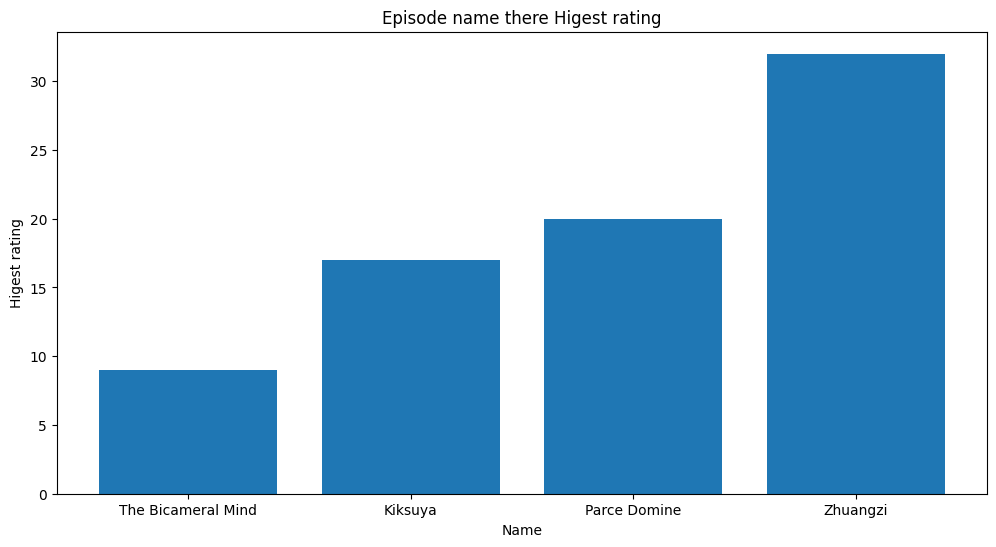

In [47]:
# plotting Name vs Higest rating
plt.figure(figsize=(12, 6))
plt.bar(episode_names_highest_rated,highest_rated_episodes)
plt.xlabel('Name')
plt.ylabel('Higest rating')
plt.title('Episode name there Higest rating')
plt.show()

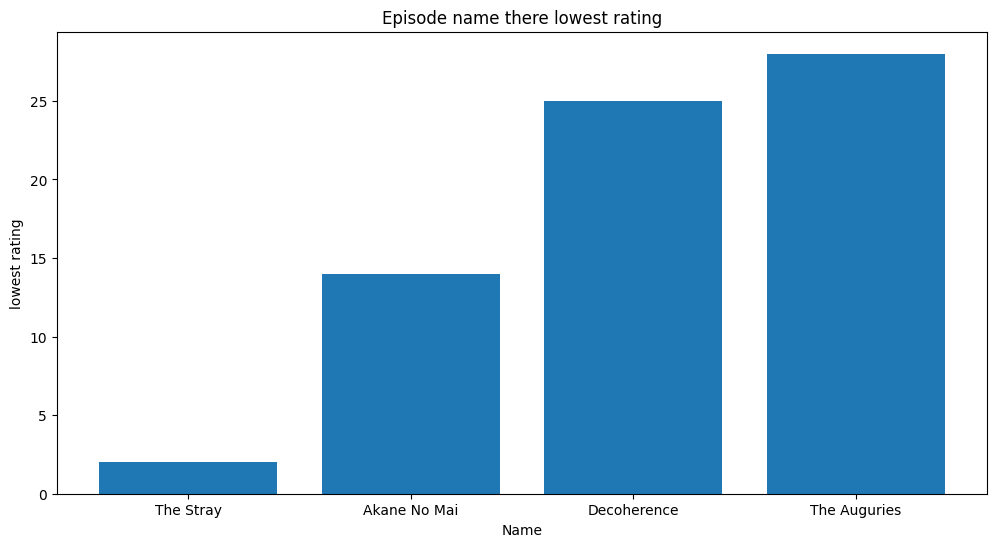

In [48]:
# plotting Name vs lowest rating
plt.figure(figsize=(12, 6))
plt.bar(episode_names_lowest_rated,lowest_rated_episodes)
plt.xlabel('Name')
plt.ylabel('lowest rating')
plt.title('Episode name there lowest rating')
plt.show()

In [54]:
# 5) Get the summary for the most popular (highest ratings) episode in every season
most_popular_episodes = df.groupby('Season')['Rating'].idxmax()
episode_summaries_most_popular = df.loc[most_popular_episodes, 'Summary'].tolist()
print("Getting summary of list for the most popular (highest ratings) episode in every season : \n",episode_summaries_most_popular)

Getting summary of list for the most popular (highest ratings) episode in every season : 
 ["Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.", "Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.", "If you're stuck in a loop, try walking in a straight line.", 'God is bored.']


In [55]:
print("Summary for the most popular episode in every season:")
for i, summary in enumerate(episode_summaries_most_popular):
    print("Season", i + 1, ":", summary)

Summary for the most popular episode in every season:
Season 1 : Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.
Season 2 : Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.
Season 3 : If you're stuck in a loop, try walking in a straight line.
Season 4 : God is bored.
